# Libraries

In [ ]:
# 📚 Basic Libraries
import pandas as pd
import numpy as np
import warnings
import os
import plotly.express as px

# 📊 Visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

# 🔧 Basic functions
def snake_columns(data):
    """
    Standarize and returns snake_case columns
    """
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]



---



#00 | Data Extraction


In [ ]:
os.listdir()

['.config', 'WA_Fn-UseC_-Telco-Customer-Churn.csv', 'sample_data']

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df = data.copy() # Making security copy

In [ ]:
snake_columns(df) # Cleaning columns snake_type



---



# 01 | About Dataset

## Context

The `Telco Customer Churn` dataset allows us to understand and predict customer behavior, helping us keep customers satisfied and loyal. By examining various customer data points, we can identify patterns and insights that inform targeted retention strategies. This dataset enables us to analyze factors influencing churn and develop tailored retention programs, ensuring the continued satisfaction and loyalty of our customers.


---


**Customer Churn:** (Meaning & Value) Customer churn is a term used to describe whether a customer is leaving or not a product or service. It's very important for companies to analyze and assess customer retention factors.


---




`Data Source:` [Kaggle link ](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)


## Data Features

* **`customerid`**: Customer identification number.
* **`gender`**: Whether the customer is male or female.
* **`seniorcitizen`**: 0 if the customer is under 65 years old, or 1 if they are 65 or older.
* **`partner`**: Whether the customer has a partner (Yes or No).
* **`dependents`**: Whether the customer has dependents (Yes, No) such as children, parents, grandparents, etc.
* **`tenure`**: Number of months the customer has stayed with the company.
* **`phoneservice`**: Whether the customer has a phone service (Yes, No).
* **`multiplelines`**: Whether the customer has multiple lines (Yes, No, No phone service).
* **`internetservice`**: Customer’s internet service provider (DSL, Fiber optic, No).
* **`onlinesecurity`**: Whether the customer has online security (Yes, No, No internet service).
* **`onlinebackup`**: Whether the customer has online backup (Yes, No, No internet service).
* **`deviceprotection`**: Whether the customer has device protection (Yes, No, No internet service).
* **`techsupport`**: Whether the customer has tech support (Yes, No, No internet service).
* **`streamingtv`**: Whether the customer has streaming TV (Yes, No, No internet service).
* **`streamingmovies`**: Whether the customer has streaming movies (Yes, No, No internet service).
* **`contract`**: Customer’s current contract type: Month-to-Month, One Year, Two Year.
* **`paperlessbilling`**: Whether the customer has paperless billing (Yes, No).
* **`paymentmethod`**: How the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.
* **`monthlycharges`**: Customer’s current total monthly charge for all services.
* **`totalcharges`**: Customer’s total charges up to the end of the specified quarter.
* **`churn`**: 1 if the customer left the company (Churn=Yes) and 0 if they remained (Churn=No) based in last quarter.





---



# 02 | Data Exploration


In [ ]:
rows, columns = df.shape

In [ ]:
print(f'Number of Rows: {rows}')
print(f'Number of Columns: {columns}')

Number of Rows: 7043
Number of Columns: 21


In [ ]:
df.dtypes # Most of the data are 'obejct'

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [ ]:
df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes




---



# 03 | Data Cleaning

## Setting Customer ID as Index

In [ ]:
# Checking duplicates in customer id
df.customerid.duplicated().sum()

0

In [ ]:
# Setting customer id as Index:
df.set_index('customerid', inplace=True)



---



## Dropping Duplicates

In [ ]:
# Cheking duplicates:
df.duplicated().sum()

22

In [ ]:
# Dropping duplicates:
df = df.drop_duplicates()

In [ ]:
# Cheking duplicates again after drop:
df.duplicated().sum()

0



---



## Checking for Null & Empty Values

In [ ]:
df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No null values so all corect.

In [ ]:
df.eq(" ").sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

We have 11 empty spaces in `totalcharge` so lets explore and fix those empty spaces.

In [ ]:
# Checking [totalcahrges] rows with empty values:
empty_totalcharges_rows = df[df.totalcharges== " "]
empty_totalcharges_rows.head(4)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


Fixing: `totalcharges`

**Observation:** `totalcharges` are empty when `tenure` is equal to zero,  which might mean that customer just started so doesn't have a 'total charge' bill just yet as the its his/her first quarter being billed.

**Solution:** We'll replace empty spaces in `totalcharges` for `0`

In [ ]:
# Replacing empty spaces in [totalcahrges] for zero's:
df.totalcharges = df.totalcharges.replace(" ", "0")

In [ ]:
# Cheking that now we have zero 'empty' values in our dataset:
df.eq(" ").sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Now our dataset is clean with no Null now Empty values.



---



# 04 | EDA (Exploratory Data Analysis)

In [ ]:
# Check unique values:
df.nunique()

gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64

In [ ]:
# Numerical Data description:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7021.0,0.162512,0.368947,0.00,0.00,0.0,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.0,55.0,72.00
monthlycharges,7021.0,64.851894,30.069001,18.25,35.75,70.4,89.9,118.75


In [ ]:
df.shape

(7021, 20)



---



## Overall Data Visualization:

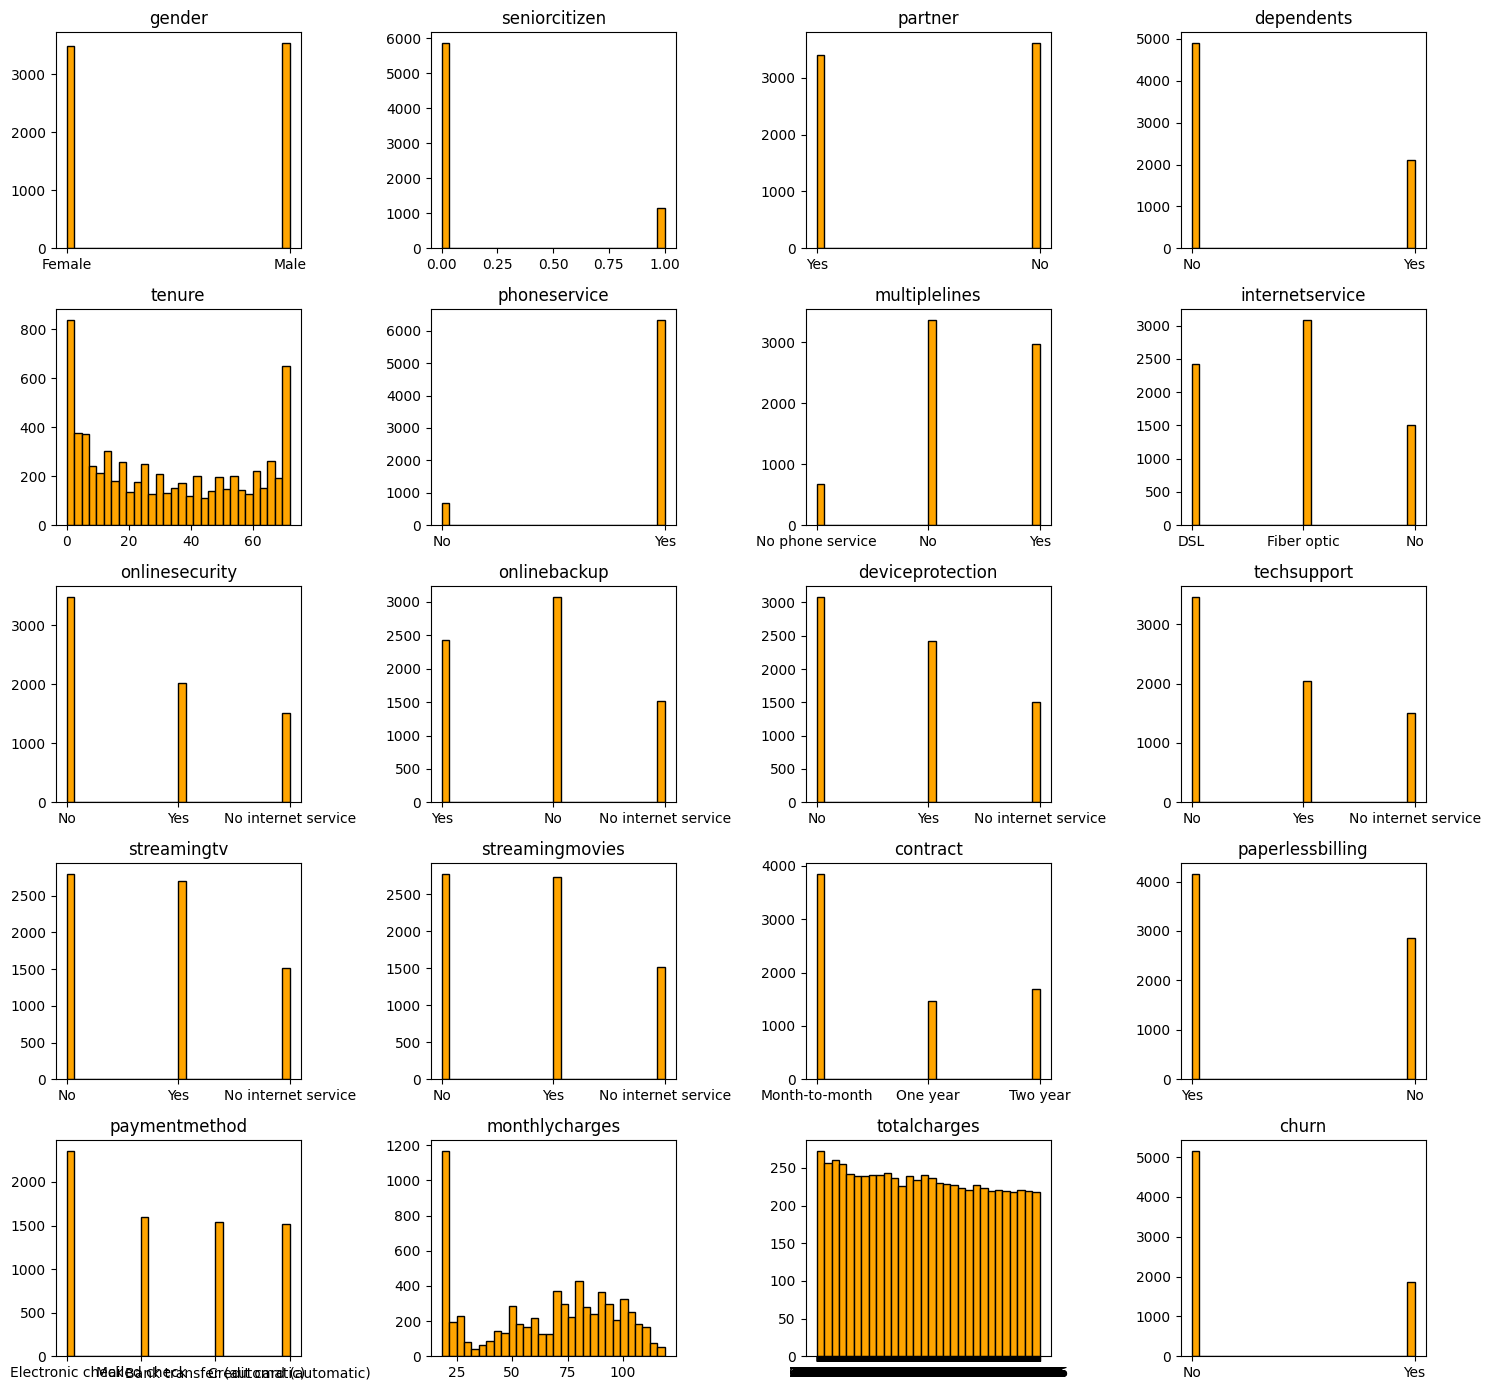

In [ ]:
# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 14))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color='orange', edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()



---



### Demographic Columns

**Description:** In this section, we'll explore the customer demographic columns such as `gender`, `seniorcitizen`, `partner`, and `dependents`, visualizing them in bar plots to observe the data distribution.

In [ ]:
# Cleaning [seniorcitizen] first to not have 0-1:
df.seniorcitizen.value_counts()

seniorcitizen
0    5880
1    1141
Name: count, dtype: int64

In [ ]:
# Applying seniority mapping:
df['seniorcitizen'] = df['seniorcitizen'].map({0: 'Less than 65 years', 1: 'Over 65 years'})

In [ ]:
# Checking that [seniorcitizen] is now fixed:
df.seniorcitizen.value_counts()

seniorcitizen
Less than 65 years    5880
Over 65 years         1141
Name: count, dtype: int64

Applying overall visualization of demographic features:

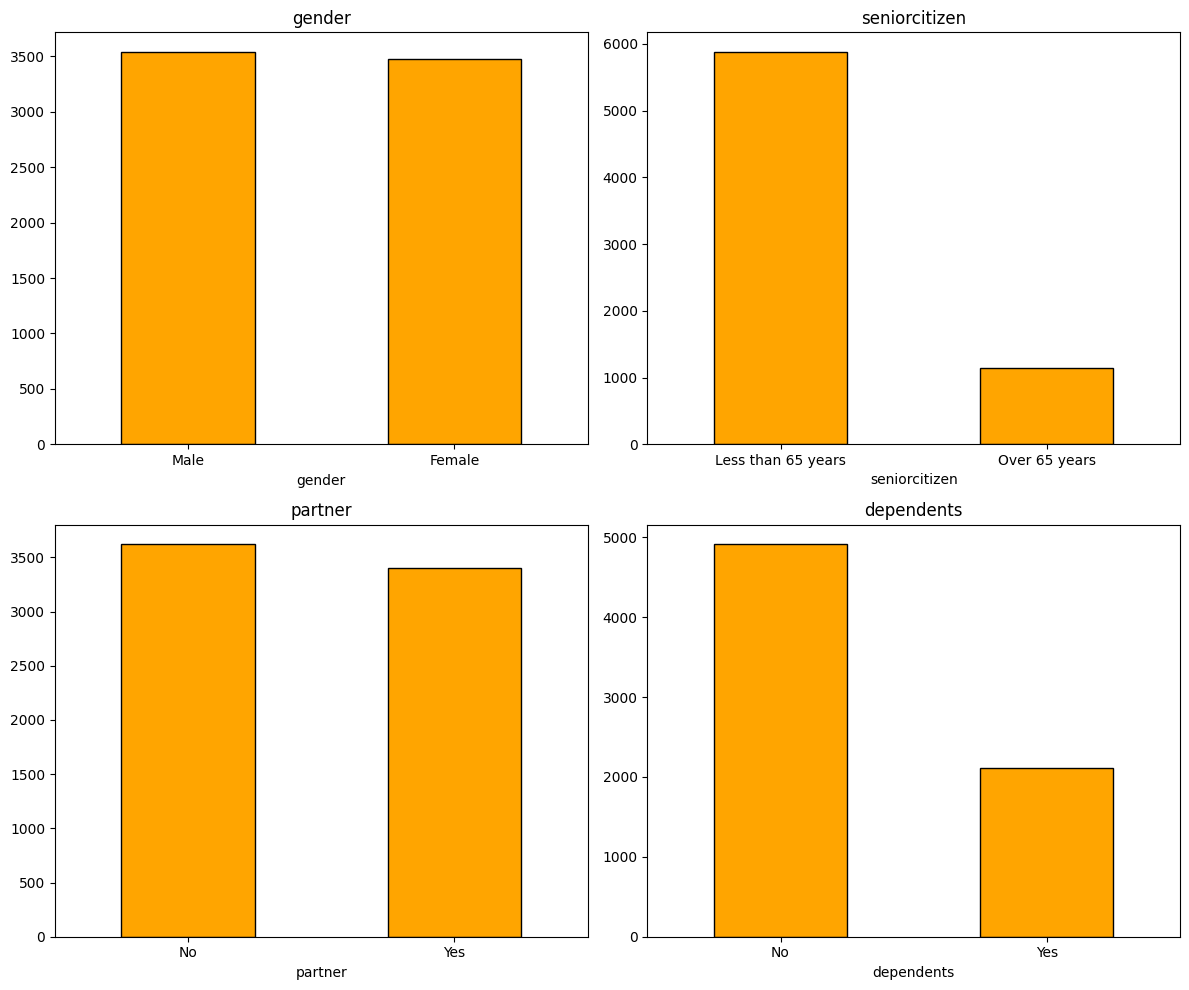

In [ ]:
# Selecting Demographic columns:
demo_columns = ['gender', 'seniorcitizen', 'partner', 'dependents']
demo_df = df[demo_columns]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each selected column
for i, column in enumerate(demo_df.columns):
    ax = axes[i // 2, i % 2]  # Calculate the position of the subplot
    demo_df[column].value_counts().plot(kind='bar', ax=ax, color='orange', edgecolor='black')
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # Rotate x-axis labels

plt.tight_layout()
plt.show()

In [ ]:
df.seniorcitizen.value_counts(normalize=1)

seniorcitizen
Less than 65 years    0.837488
Over 65 years         0.162512
Name: proportion, dtype: float64



---



### Technical / Service Columns

**Description:** In this section, we'll explore the customer service-related columns such as `phoneservice`, `multiplelines`, `internetservice`, `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, and `streamingmovies`. These columns provide insights into the types of services customers are subscribed to. We'll visualize the distribution of these services using bar plots, which will help us understand the prevalence of each service among customers.


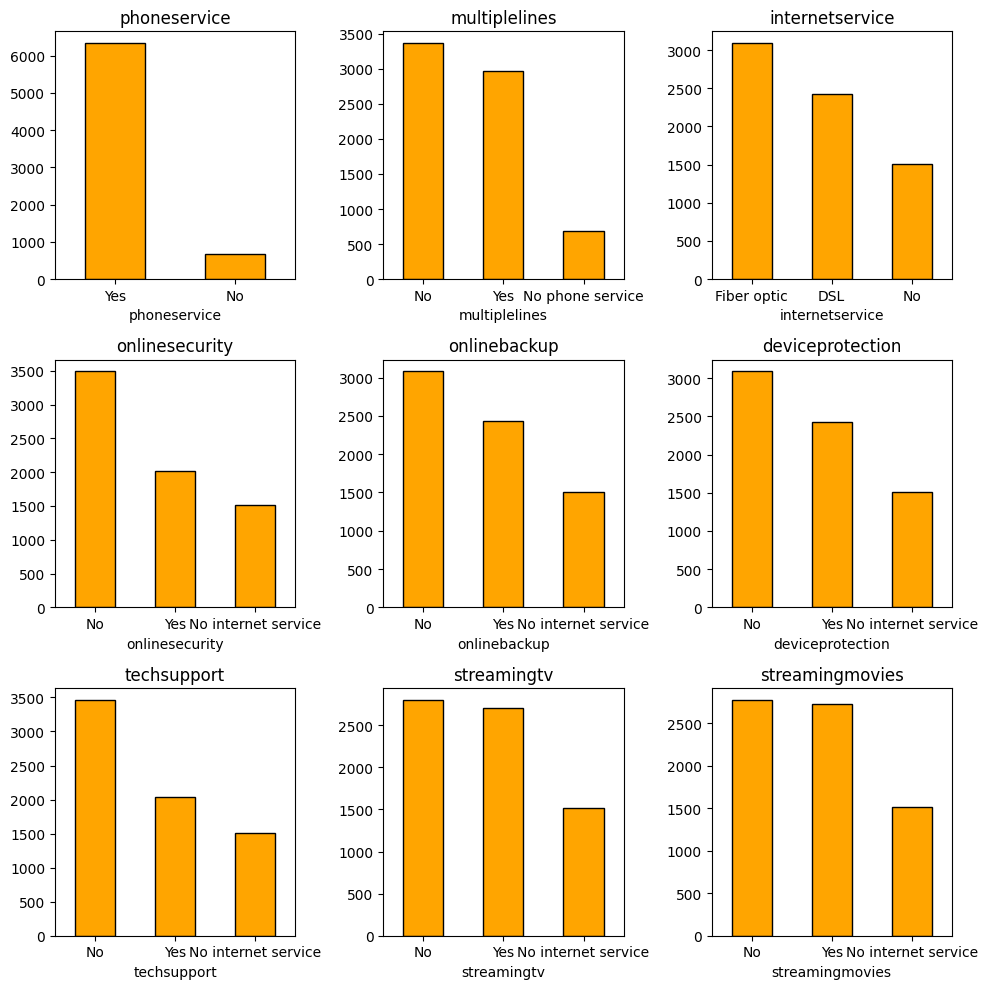

In [ ]:
# Selecting the Tec/service columns
service_columns = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
                   'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
service_df = df[service_columns]

# Set up the figure and axes
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each selected column
for i, column in enumerate(service_df.columns):
    service_df[column].value_counts().plot(kind='bar', ax=axes[i], color='orange', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, ha='center')  # Rotate x-axis labels

# Hide any remaining subplots if the number of columns is less than 9
for ax in axes[len(service_df.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()



---



### Payment Columns

**Description:** In this section, we'll explore the customer payment-related columns such as `contract`, `paperlessbilling`, `paymentmethod`, and `monthlycharges`. These columns provide insights into customers' billing preferences, payment methods, and the charges incurred. We'll visualize the distribution of these payment-related features to gain a better understanding of how customers interact with payment options and their associated charges.

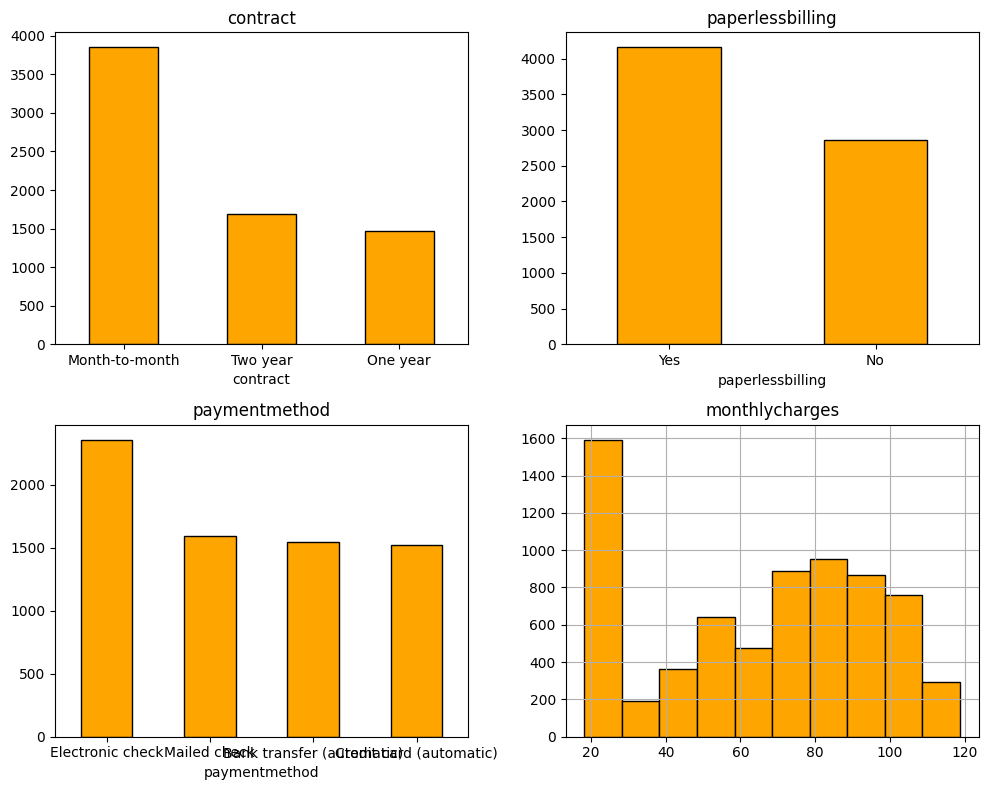

In [ ]:
# Selecting the payment columns
payment_columns = ['contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges']
payment_df = df[payment_columns]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each selected column
for i, column in enumerate(payment_df.columns):
    if column == 'monthlycharges':
        payment_df[column].hist(ax=axes[i], color='orange', edgecolor='black')
        axes[i].set_title(column)
    else:
        payment_df[column].value_counts().plot(kind='bar', ax=axes[i], color='orange', edgecolor='black')
        axes[i].set_title(column)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, ha='center')  # Rotate x-axis labels

# Hide any remaining subplots if the number of columns is less than 6
for ax in axes[len(payment_df.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

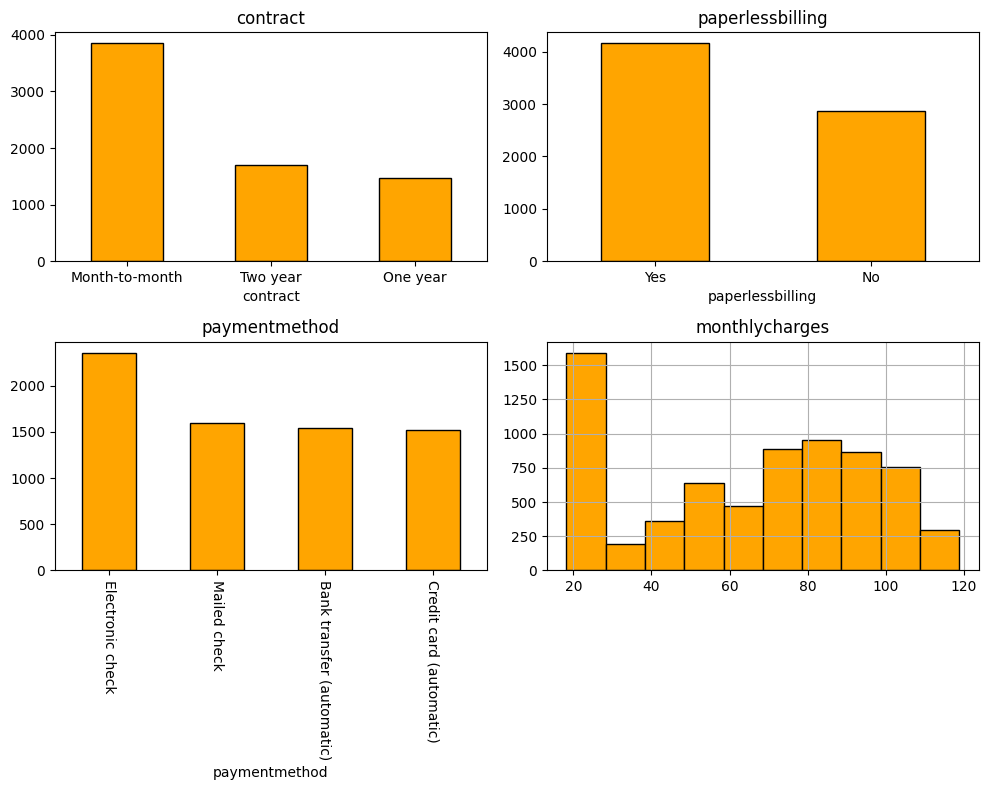

In [ ]:
# Selecting the payment columns
payment_columns = ['contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges']
payment_df = df[payment_columns]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each selected column
for i, column in enumerate(payment_df.columns):
    if column == 'paymentmethod':
        payment_df[column].value_counts().plot(kind='bar', ax=axes[i], color='orange', edgecolor='black')
        axes[i].set_title(column)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90, ha='center')  # Rotate x-axis labels
    elif column == 'monthlycharges':
        payment_df[column].hist(ax=axes[i], color='orange', edgecolor='black')
        axes[i].set_title(column)
    else:
        payment_df[column].value_counts().plot(kind='bar', ax=axes[i], color='orange', edgecolor='black')
        axes[i].set_title(column)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, ha='center')  # Rotate x-axis labels

# Hide any remaining subplots if the number of columns is less than 6
for ax in axes[len(payment_df.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()




---



### `Total Charges`

`totalcharges` has type `object` and we should change to `numeric`:

In [ ]:
# Changing [totalcharges] to numeric:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

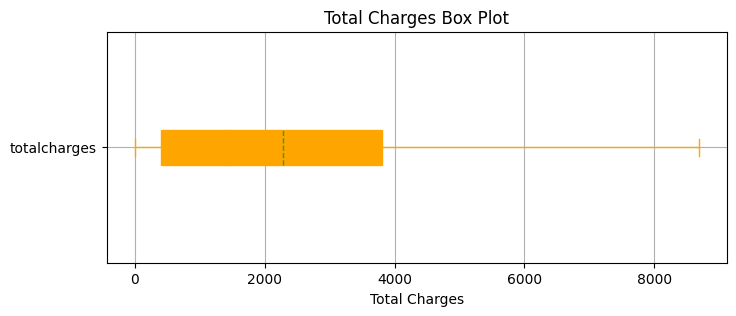

In [ ]:
# Total charges box plot:
totalcharges_df = df['totalcharges']

# Set up the figure and axes for the totalcharges box plot
plt.figure(figsize=(8, 3))
totalcharges_df.plot(kind='box', color='orange', patch_artist=True, vert=False, showmeans=True, meanline=True)
plt.title('Total Charges Box Plot')
plt.xlabel('Total Charges')
plt.grid(True)
plt.show()



---



### `Tenure`

- Cleaning `tenure` column and dividing between: `months` and `years`

In [ ]:
# First renaming [tenure] name as [tenure_months] for better clarity:
df.rename(columns={'tenure': 'tenure_months'}, inplace=True)

In [ ]:
# Now we can create a new column called [tenure_years] and add to our dataset:
df['tenure_years'] = df.tenure_months/12

- Moving `tenure_years` next to `tenure_months` for better visibility and to keep the taget `churn` at the right.

In [ ]:
# Current list of columns
current_columns = df.columns.tolist()

# Desired new list of columns
new_columns = current_columns[:current_columns.index('tenure_months') + 1] + \
              ['tenure_years'] + \
              current_columns[current_columns.index('tenure_months') + 1:current_columns.index('tenure_years')] + \
              current_columns[current_columns.index('tenure_years') + 1:]

# Reindex the DataFrame
df = df[new_columns]

In [ ]:
# Checking column is fixed
df.head(2)

,gender,seniorcitizen,partner,dependents,tenure_months,tenure_years,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
customerid,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Less than 65 years,Yes,No,1,0.083333,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,Less than 65 years,No,No,34,2.833333,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


Now let's do two boxplots to visualize customer's tenure in years and months:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7021.0,32.469449,24.534965,0.00,9.00,29.000000,55.000000,72.00
tenure_years,7021.0,2.705787,2.044580,0.00,0.75,2.416667,4.583333,6.00
monthlycharges,7021.0,64.851894,30.069001,18.25,35.75,70.400000,89.900000,118.75
totalcharges,7021.0,2286.765026,2266.855057,0.00,403.35,1400.550000,3801.700000,8684.80


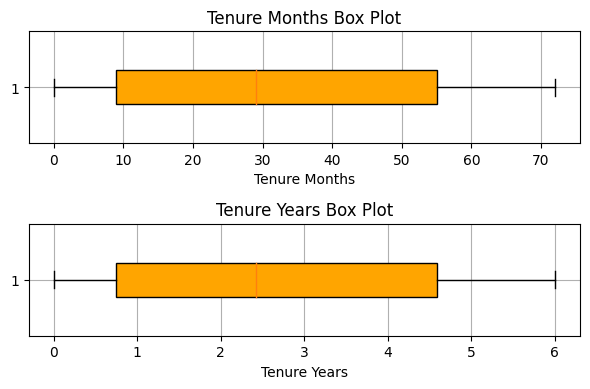

In [ ]:
df['tenure_years'] = df['tenure_months'] / 12

# Set up the figure and axes for the box plots
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

# Box plot for tenure_months
axes[0].boxplot(df['tenure_months'], patch_artist=True, vert=False, widths=0.3, boxprops=dict(facecolor='orange'))
axes[0].set_title('Tenure Months Box Plot')
axes[0].set_xlabel('Tenure Months')
axes[0].grid(True)

# Box plot for tenure_years
axes[1].boxplot(df['tenure_years'], patch_artist=True, vert=False, widths=0.3, boxprops=dict(facecolor='orange'))
axes[1].set_title('Tenure Years Box Plot')
axes[1].set_xlabel('Tenure Years')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7021.0,32.469449,24.534965,0.00,9.00,29.000000,55.000000,72.00
tenure_years,7021.0,2.705787,2.044580,0.00,0.75,2.416667,4.583333,6.00
monthlycharges,7021.0,64.851894,30.069001,18.25,35.75,70.400000,89.900000,118.75
totalcharges,7021.0,2286.765026,2266.855057,0.00,403.35,1400.550000,3801.700000,8684.80




---



## Target: `Churn`

`churn` is our target column because the goal of this analytical assessment is to test hypotheses based upon whether customers are leaving (`churn` = `Yes`) or not (`churn` = `No`). Therefore, we'll first examine the value counts and visualize the distribution of the target column `churn`.

In [ ]:
# Checking value counts of target column [churn]:
df.churn.value_counts()

churn
No     5164
Yes    1857
Name: count, dtype: int64

In [ ]:
# Churn distribution in %:
df['churn'].value_counts(normalize=True).mul(100).round(2)

churn
No     73.55
Yes    26.45
Name: proportion, dtype: float64

<Axes: xlabel='churn', ylabel='Count'>

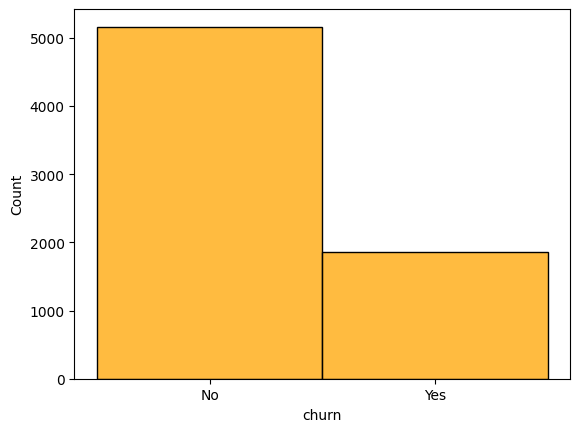

In [ ]:
# Churn histogram:
sns.histplot(df.churn, color='orange')

In [ ]:
df.shape

(7021, 21)

In [ ]:
churn_count = df[df['churn'] == 'Yes'].shape[0]  # Count churned customers
total_count = df.shape[0]  # Total number of customers

churn_rate = churn_count / total_count  # Calculate churn rate

print(f"Churn Rate: {churn_rate}")

Churn Rate: 0.2644922375729953




---



## Checking Outliers

We'll check for potential outliers in our numerical columns. This is not applicable to categorical columns.


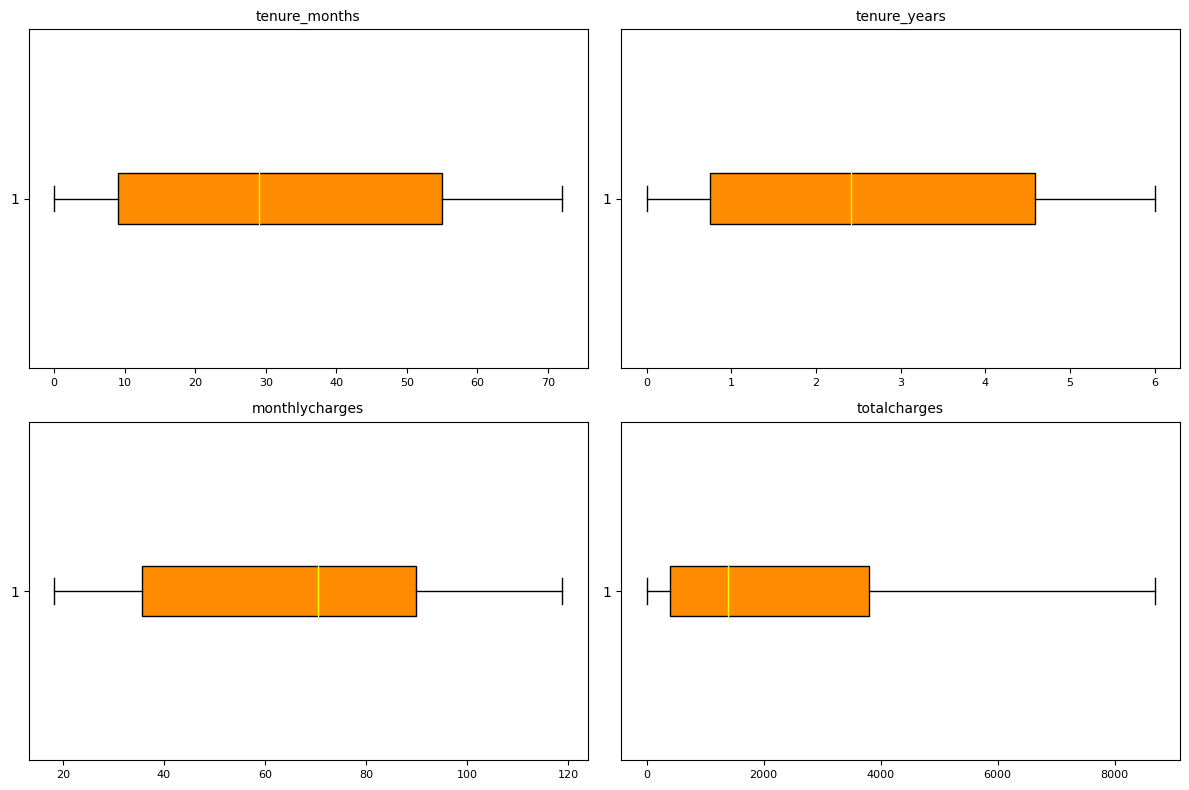

In [ ]:
color = '#FF8C00'

# Columns to plot
columns_to_plot = ['tenure_months', 'tenure_years', 'monthlycharges', 'totalcharges']

# Grid size
nrows, ncols = 2, 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.boxplot(df[col].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(col, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

We can confirm that there are **no outliers**.


---



# 05 | Feature Scaling and Engineering

## Customer Value Matrix:

 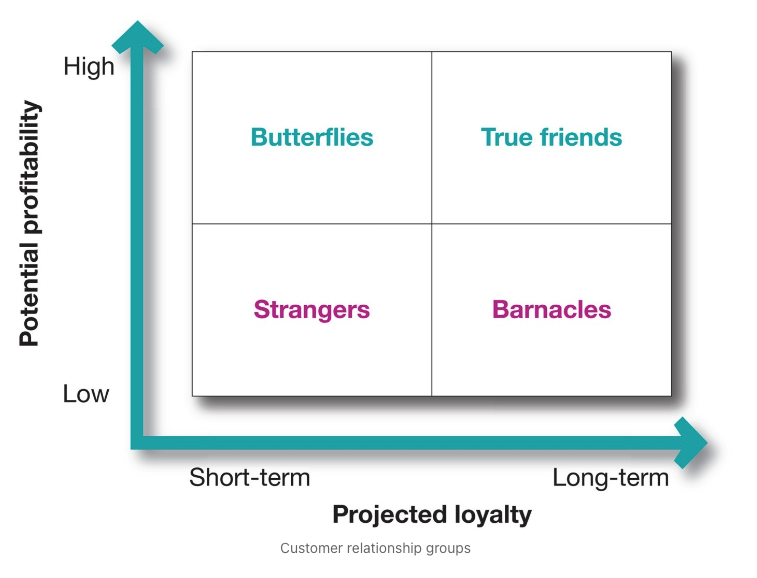


## Customer Value Matrix

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7021.0,32.469449,24.534965,0.00,9.00,29.000000,55.000000,72.00
tenure_years,7021.0,2.705787,2.044580,0.00,0.75,2.416667,4.583333,6.00
monthlycharges,7021.0,64.851894,30.069001,18.25,35.75,70.400000,89.900000,118.75
totalcharges,7021.0,2286.765026,2266.855057,0.00,403.35,1400.550000,3801.700000,8684.80


Customer segmentation criteria:

### Loyalty

**Loyalty:** Based on `tenure`

* `tenure` => 3 years = `high_loyal`
* `tenure` < 3  years = `low_loyal`


In [ ]:
# First I'll do another dataset to not mess with the original:
customer_df = df.copy()

In [ ]:
# Creating a function to define loyalty:
def segment_loyal(tenure_years):
  if tenure_years >= 2.8:
    return 'High'
  else:
    return 'Low'

In [ ]:
# Apply the function to create 'loyal' column:
customer_df['loyal'] = customer_df['tenure_years'].apply(segment_loyal)

# Print the first few rows to verify
customer_df.head()

,gender,seniorcitizen,partner,dependents,tenure_months,tenure_years,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,loyal
customerid,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Less than 65 years,Yes,No,1,0.083333,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low
5575-GNVDE,Male,Less than 65 years,No,No,34,2.833333,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,High
3668-QPYBK,Male,Less than 65 years,No,No,2,0.166667,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low
7795-CFOCW,Male,Less than 65 years,No,No,45,3.750000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,High
9237-HQITU,Female,Less than 65 years,No,No,2,0.166667,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Low


In [ ]:
# check loyalty distribution:
loyal_counts = customer_df.loyal.value_counts()
loyal_counts

loyal
Low     3817
High    3204
Name: count, dtype: int64

<BarContainer object of 2 artists>

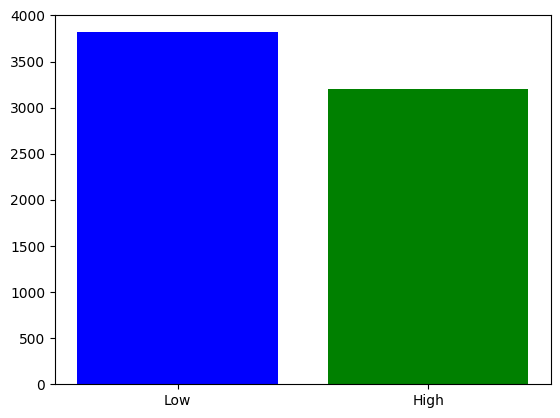

In [ ]:
# Plot loyalty:
plt.bar(loyal_counts.index, loyal_counts.values, color=['blue', 'green'])

### Profitability

**Profitability:** Based on `monthlycharges`

* `monthlycharges` > mean (64.8) = `high_profit`
* `monthlycharges` < mean (64.8) =  `low_profit`


In [ ]:
# Get monthly charges mean:
monthlycharges_mean = customer_df.monthlycharges.mean()
monthlycharges_mean

64.85189431704886

In [ ]:
# Create profitability function:
def segment_profit(monthly_charges):
  if monthly_charges >= monthlycharges_mean:
    return 'High'
  else:
    return 'Low'

In [ ]:
# Create profit column and apply function:
customer_df['profit'] = customer_df['monthlycharges'].apply(segment_profit)

In [ ]:
profit_count = customer_df.profit.value_counts()
profit_count

profit
High    3909
Low     3112
Name: count, dtype: int64

<BarContainer object of 2 artists>

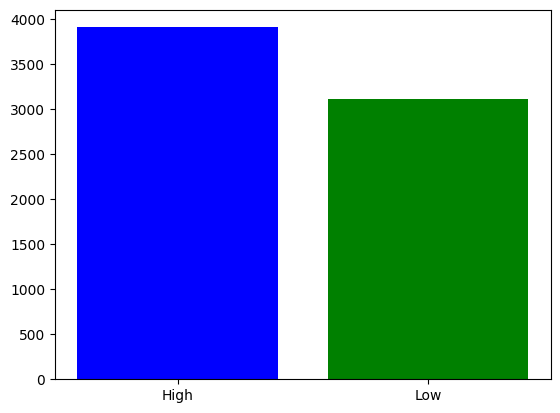

In [ ]:
# Polt profit segmentation:
plt.bar(profit_count.index, profit_count.values, color=['blue', 'green'])

## Customer Segmentation

In [ ]:
# Create a customer segmentation result function
def customer_segment(row):
    if row['loyal'] == 'High' and row['profit'] == 'High':
        return 'True Friends'
    elif row['loyal'] == 'High' and row['profit'] == 'Low':
        return 'Barnacles'
    elif row['loyal'] == 'Low' and row['profit'] == 'Low':
        return 'Strangers'
    elif row['loyal'] == 'Low' and row['profit'] == 'High':
        return 'Butterflies'

In [ ]:
# Apply the customer segment function to customer_df:
customer_df['customer_segment'] = customer_df.apply(customer_segment, axis=1)

In [ ]:
# Checking results
customer_df.customer_segment.value_counts()

customer_segment
True Friends    2022
Strangers       1930
Butterflies     1887
Barnacles       1182
Name: count, dtype: int64

In [ ]:
# Checking there are no Nulls in customer segmentation:
customer_df.customer_segment.isna().sum()

0

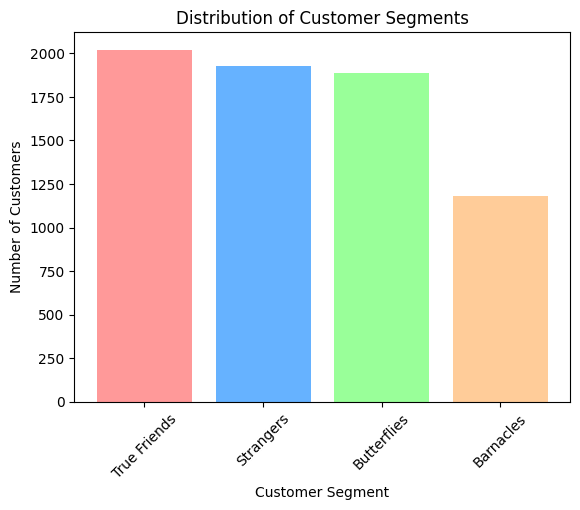

In [ ]:
# Ploting customer segmenation:
segment_counts = customer_df['customer_segment'].value_counts()

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.bar(segment_counts.index, segment_counts.values, color=colors)

# Add labels and title
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

### Segmentation by target

Here we want to see if applying the customer value matrix segmentation separately by target `churn` gives valuable insights.



In [ ]:
# Creating one customer_df dataset with only yes:
churn_yes_customer_df = customer_df[customer_df['churn'] == 'Yes']
churn_yes_customer_df.shape

(1857, 24)

In [ ]:
# Creating one customer_df dataset with only No:
churn_no_customer_df = customer_df[customer_df['churn'] == 'No']
churn_no_customer_df.shape

(5164, 24)

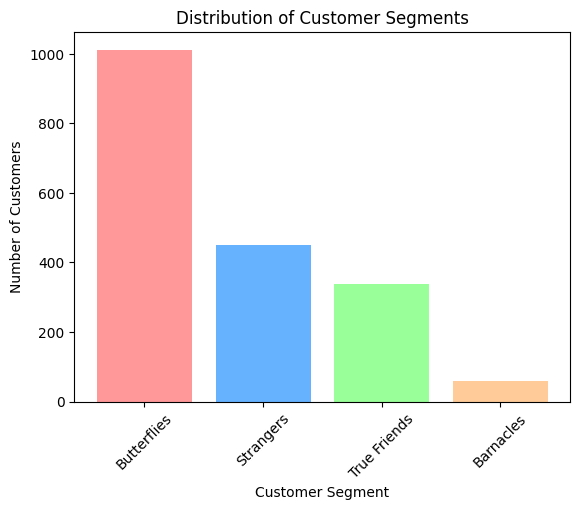

In [ ]:
# Ploting customer segmenation (Churn = yes)
yes_segment_counts = churn_yes_customer_df['customer_segment'].value_counts()

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.bar(yes_segment_counts.index, yes_segment_counts.values, color=colors)

# Add labels and title
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

In [ ]:
churn_yes_customer_df['customer_segment'].value_counts(normalize=1)

customer_segment
Butterflies     0.544965
Strangers       0.242326
True Friends    0.181475
Barnacles       0.031233
Name: proportion, dtype: float64

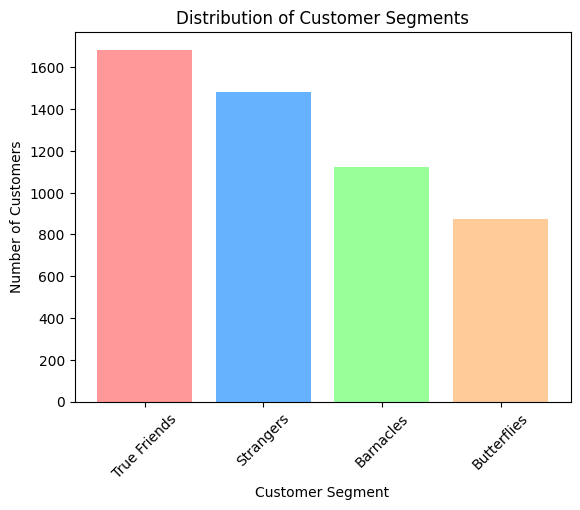

In [ ]:
# Ploting customer segmenation (Churn = No)
no_segment_counts = churn_no_customer_df['customer_segment'].value_counts()

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.bar(no_segment_counts.index, no_segment_counts.values, color=colors)

# Add labels and title
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()



---



# 06 | Looking for Correlations


In this section we'll look for potential correlations between columns applying different methods.

In [ ]:
df.dtypes # Most of columns are 'object' type

gender               object
seniorcitizen        object
partner              object
dependents           object
tenure_months         int64
tenure_years        float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

### Changing `Categoricals` to `Numericals`

In order to create a heatmap to find correlations, we first have to change all the columns to numerical, as they are currently mostly of `object` type. However, they could be mapped to dummy variables or converted to numerical values with a three-value mapping.

In [ ]:
# Creating a new Dataframe [df_2] to not change [df]:
df_2 = df.copy()

Demographic Columns Mapping:

In [ ]:
# Demographic columns mapping:
gender_map = {'Male': 0, 'Female': 1}
senior_map = {'Less than 65 years': 0, 'Over 65 years': 1}
partner_map = {'No': 0, 'Yes': 1}
dependents_map = {'No': 0, 'Yes': 1}

# Applying the mapping to the demographic columns:
df_2.gender = df_2.gender.map(gender_map)
df_2.seniorcitizen = df_2.seniorcitizen.map(senior_map)
df_2.partner = df_2.partner.map(partner_map)
df_2.dependents = df_2.dependents.map(dependents_map)

Technical / Service Columns Mapping:

In [ ]:
# Technical / Service columns mapping:
phoneservice_map = {'No': 0, 'Yes': 1}
multiplelines_map = {'No phone service': 0, 'No': 0.5, 'Yes': 1}
internetservice_map = {'No': 0, 'DSL': 0.5, 'Fiber optic': 1}
service_map = {'No internet service': 0, 'No': 0.5, 'Yes': 1}

# Applying the mappings to respective columns:
df_2.phoneservice = df_2.phoneservice.map(phoneservice_map)
df_2.multiplelines = df_2.multiplelines.map(multiplelines_map)
df_2.internetservice = df_2.internetservice.map(internetservice_map)
df_2.onlinesecurity = df_2.onlinesecurity.map(service_map)
df_2.onlinebackup = df_2.onlinebackup.map(service_map)
df_2.deviceprotection = df_2.deviceprotection.map(service_map)
df_2.techsupport = df_2.techsupport.map(service_map)
df_2.streamingtv = df_2.streamingtv.map(service_map)
df_2.streamingmovies = df_2.streamingmovies.map(service_map)

In [ ]:
df_2.dtypes

gender                int64
seniorcitizen         int64
partner               int64
dependents            int64
tenure_months         int64
tenure_years        float64
phoneservice          int64
multiplelines       float64
internetservice     float64
onlinesecurity      float64
onlinebackup        float64
deviceprotection    float64
techsupport         float64
streamingtv         float64
streamingmovies     float64
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

Payment and Churn Columns Mapping:

In [ ]:
# Payment columns mapping:
contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
billing_map = {'No': 0, 'Yes': 1}
payment_map = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
churn_map = {'No': 0, 'Yes': 1}

# Applying the mappings to respective columns:
df_2.contract = df_2.contract.map(contract_map)
df_2.paperlessbilling = df_2.paperlessbilling.map(billing_map)
df_2.paymentmethod = df_2.paymentmethod.map(payment_map)
df_2.churn = df_2.churn.map(churn_map)

## Heatmap

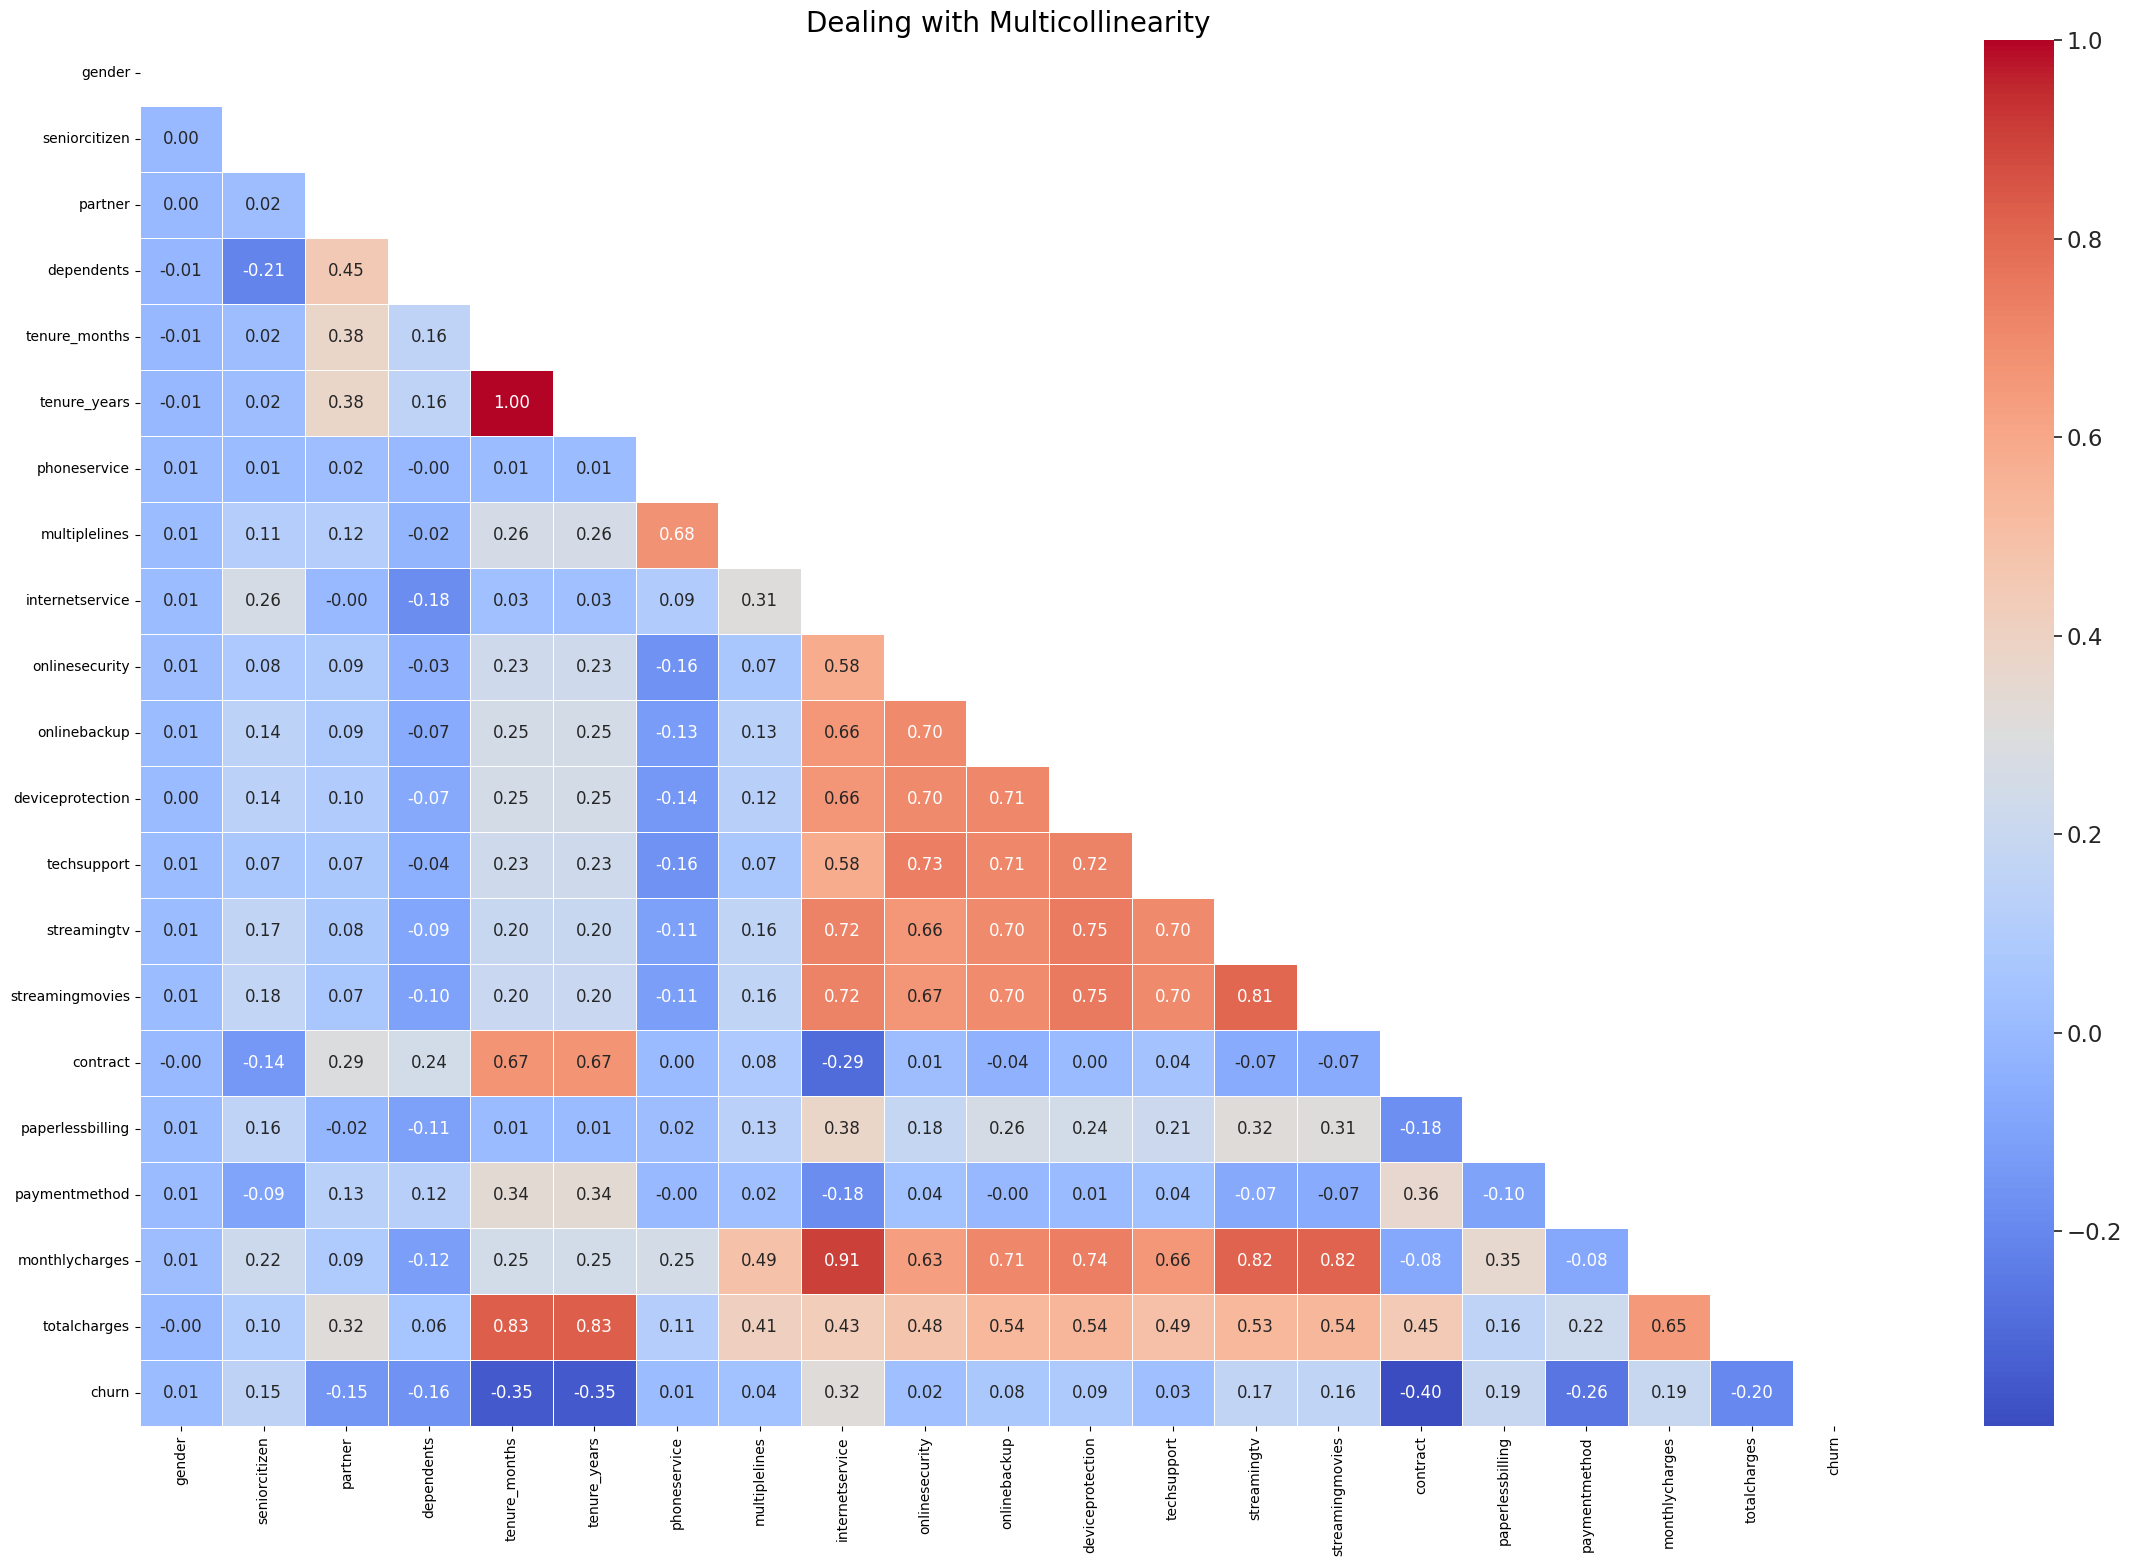

In [ ]:
# Compute the correlation matrix
num_corr = df_2.corr()

# Create a mask to hide the upper triangle for aesthetics
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True

# Create the heatmap
f, ax = plt.subplots(figsize=(28, 18))
sns.set(font_scale=1.5) # Increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Dealing with Multicollinearity", fontsize=20) # Add title
plt.show()

## Correlation-With

In [ ]:
# Applying 'corrwith' sorted to see correlations to target:
correlation_with_churn = df_2.corrwith(df_2['churn']).sort_values(ascending=False)
correlation_with_churn

churn               1.000000
internetservice     0.317464
monthlycharges      0.194508
paperlessbilling    0.190891
streamingtv         0.166073
streamingmovies     0.164621
seniorcitizen       0.151619
deviceprotection    0.085550
onlinebackup        0.075052
multiplelines       0.037429
techsupport         0.027513
onlinesecurity      0.023758
phoneservice        0.011323
gender              0.008763
partner            -0.149135
dependents         -0.163459
totalcharges       -0.197198
paymentmethod      -0.261892
tenure_months      -0.351508
tenure_years       -0.351508
contract           -0.396531
dtype: float64

Text(0, 0.5, 'Correlation Coeficient')

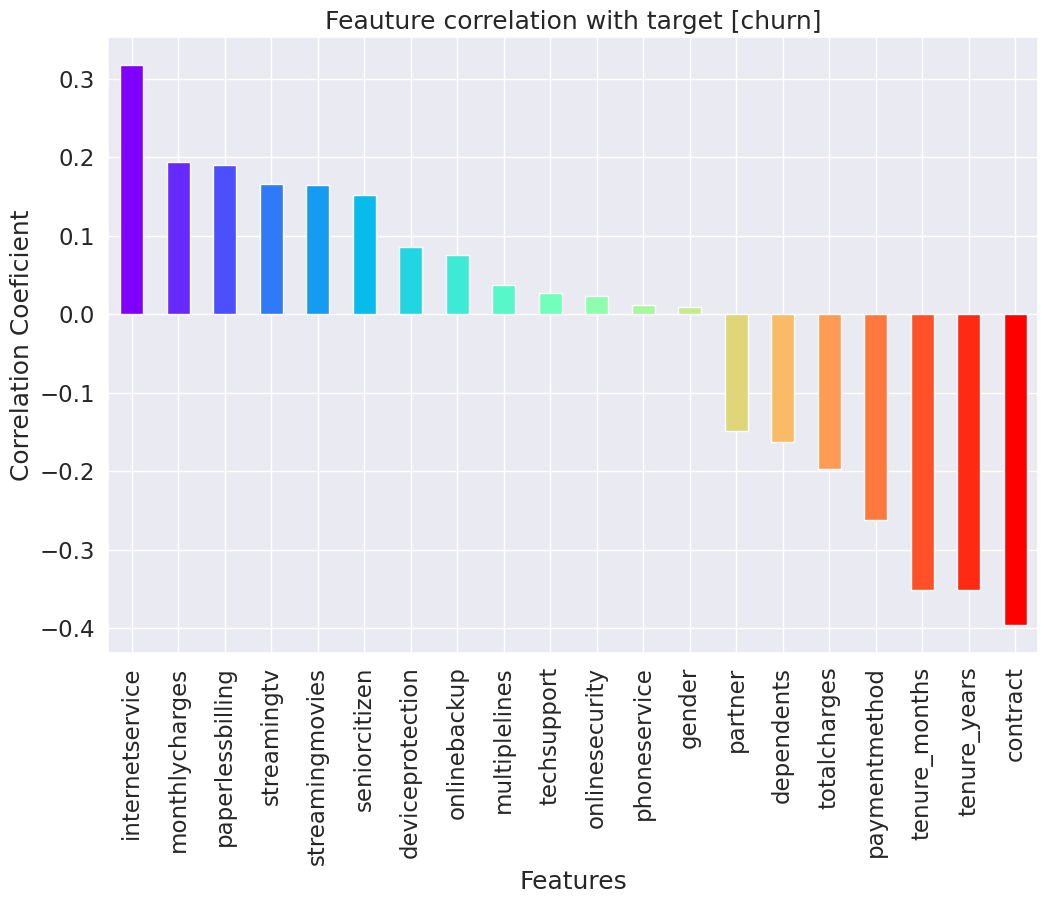

In [ ]:
# Ploting the correlation with results for better visualization:
plt.figure(figsize=(12,8))
num_features = len(correlation_with_churn) - 1  # Exclude 'churn' itself
colors = cm.rainbow(np.linspace(0, 1, num_features))

correlation_with_churn.drop('churn').plot(kind='bar', color=colors)
plt.title('Feauture correlation with target [churn]')
plt.xlabel('Features')
plt.ylabel('Correlation Coeficient')

# 07 | Bivariate Analysis

## Contract - Churn

From the Correlation results we learned that `contract` has the highest correlation (around 0.4) to our target `churn` so we'll do a bivariate analysis between our target `churn` and the `contract` type:

### Crosstab

In [ ]:
# Crosstab between [churn] & [contract]
churn_contract_crosstab = pd.crosstab(df['churn'], df['contract'])
churn_contract_crosstab

contract,Month-to-month,One year,Two year
churn,,,
No,2210,1307,1647
Yes,1643,166,48


<Axes: xlabel='contract', ylabel='count'>

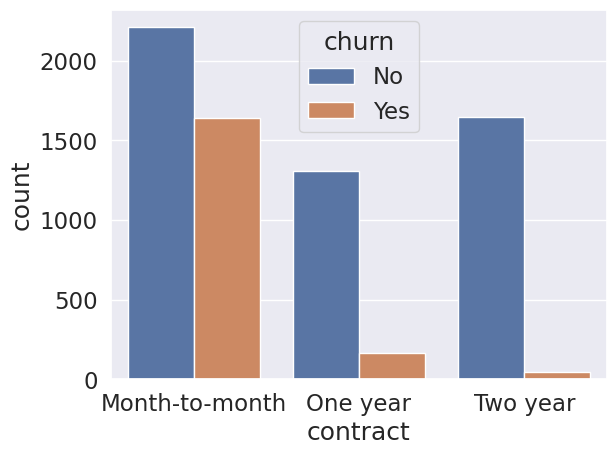

In [ ]:
# Plotting a grouped bar chart for churn-contarct
sns.countplot(data=df, x='contract', hue='churn')

### Chi-Sqaure Test

Tests the independence of two categorical variables by comparing observed frequencies to expected frequencies.

* The chi-square test is a statistical test used to **determine whether there is a significant association between two categorical variables**.

* Interpretation: if p-value < 0.05, this suggests that there is a significant association between the categorical variables. P-value >= 0.05, indicates that there is not enough evidence to conclude a significant association between the variables.


In [ ]:
# Import Chi Sqaure:
from scipy.stats import chi2_contingency

In [ ]:
# Chi-square test for 'Churn' and 'Contract' type
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(churn_contract_crosstab)

chi2_statistic, chi2_p_value

(1179.8029713383094, 6.442284610020534e-257)

**Chi-Square Conclusions:**

Chi-Square Statistic = (1179.80):

This value indicates a strong relationship between contract type and customer churn as we saw in the correlation tests too. Higher chi-square statistics suggest a greater likelihood that the observed distribution of churn across contract types is not due to chance.

Chi-Square p-value (6.44e-257):

We can see a very small p-value (below 0.05), which means that there is a significant association between the categorical variables (churn-contract).

The chi-square test results provide strong evidence that contract type is not randomly associated with customer churn in your dataset. There's a statistically significant relationship between the two.

Conclusion:

With a high chi-square statistic and a very small p-value, we can confidently reject the null hypothesis that there's no association between contract type and customer churn. In other words, there's strong statistical evidence that the type of contract a customer has is related to their likelihood of churning.

### Cramér's V

While the Chi-square test informs us about the independence of two categorical variables, Cramér's V measures the strength of the association between them.

* Cramer's V is a measure of association used to **quantify the strength of the relationship between categorical variables**.

* Interpretation: Cramer's V ranges from 0 to 1, where **0 indicates no association, and 1 represents a perfect association between the variables**. A higher value of Cramer's V indicates a stronger relationship between the categorical variables.

In [ ]:
# Import Cramer's V
from scipy.stats.contingency import association

In [ ]:
# Computing the association between variables in 'crossta' (churn-contract):
association(churn_contract_crosstab, method="cramer")

0.4099258031978182

**Cramer's V Conclusions:**

* With a Cramer's v result of 0.4099, it suggests a moderate association between contract type and churn.


* This implies that while contract type is not the sole driver of churn, it plays a noticeable role in influencing customer behavior.

<Axes: xlabel='churn'>

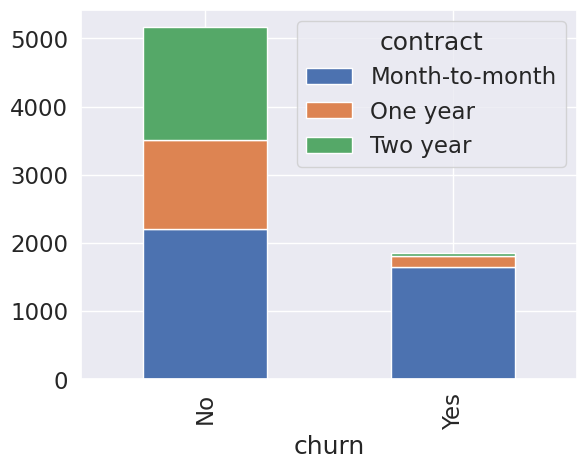

In [ ]:
# Plotting a stacked bar chart for the 'churn' 'contract' crosstab:
churn_contract_crosstab.plot(kind="bar", stacked=True)

## Internet Service - Churn

One of the second highest correlations with our target is the `internetservice` so we'll analyse this feature:

### Crosstab

In [ ]:
# First checking the internet service total values:
df.internetservice.value_counts(normalize=1)

internetservice
Fiber optic    0.440108
DSL            0.344538
No             0.215354
Name: proportion, dtype: float64

In [ ]:
# Crosstab between [churn] & [contract]
churn_internet_crosstab = pd.crosstab(df['churn'], df['internetservice'])
churn_internet_crosstab

internetservice,DSL,Fiber optic,No
churn,,,
No,1962,1799,1403
Yes,457,1291,109


<Axes: xlabel='internetservice', ylabel='count'>

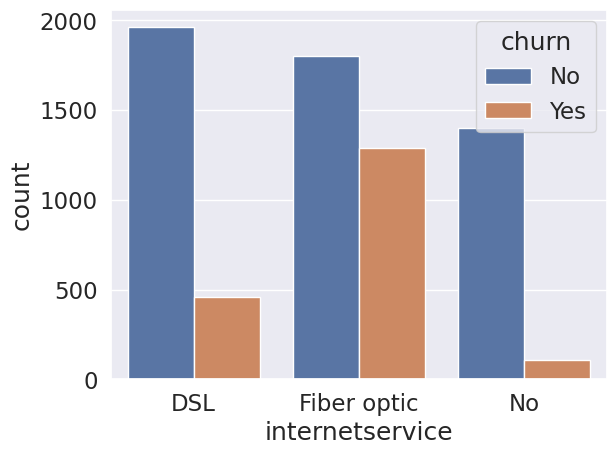

In [ ]:
# Plotting a grouped bar chart for churn-contarct
sns.countplot(data=df, x='internetservice', hue='churn')

Chi square for internetservice:

In [ ]:
# Chi-square test for 'Churn' and 'internetservice' type
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(churn_internet_crosstab)

chi2_statistic, chi2_p_value

(732.0574641622607, 1.0857790034735195e-159)

Cramer's V:

In [ ]:
# Computing the association between variables in 'crosstab' (churn-internet):
association(churn_internet_crosstab, method="cramer")

0.32290375845720415

### Two Sample T-test

Trying a T-test with `gender` and `tenure` as `tenure` it is one of the correlations with `churn`. So testing some hypothesis to see if gender could affect.

In [ ]:
# Filter data for males
male_df = df[df['gender'] == 'Male']

# Filter data for females
female_df = df[df['gender'] == 'Female']

# Calculate sample size, mean, and standard deviation for males and females
male_tenure_mean = male_df['tenure_months'].mean()
male_tenure_std = male_df['tenure_months'].std()
male_tenure_size = len(male_df)

female_tenure_mean = female_df['tenure_months'].mean()
female_tenure_std = female_df['tenure_months'].std()
female_tenure_size = len(female_df)

# Print the results
print("Male Tenure(months) Mean:", male_tenure_mean)
print("Male Tenure(months) Standard Deviation:", male_tenure_std)
print("Male Tenure(months) Sample Size:", male_tenure_size)
print("\nFemale Tenure(months) Mean:", female_tenure_mean)
print("Female Tenure(months) Standard Deviation:", female_tenure_std)
print("Female Tenure(months) Sample Size:", female_tenure_size)

Male Tenure(months) Mean: 32.619881389438014
Male Tenure(months) Standard Deviation: 24.625226835688057
Male Tenure(months) Sample Size: 3541

Female Tenure(months) Mean: 32.31637931034483
Female Tenure(months) Standard Deviation: 24.445366262311673
Female Tenure(months) Sample Size: 3480


In [ ]:
# Import T-test:
from scipy.stats import ttest_ind

In [ ]:
# Doing t-test
t_statistic, p_value = ttest_ind(male_df['tenure_months'], female_df['tenure_months'])

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.5182110948613101
p-value: 0.6043273286655223


**Tenure Comparison:** We conducted a t-test to compare the tenure (length of service) of male and female customers.

* No Significant Difference: The t-statistic (0.518) and p-value (0.604) indicate no statistically significant difference in average tenure between males and females at a 5% significance level.

* Based on the available data, we cannot conclude that male or female customers have a significantly longer average tenure with the company.